**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challange 2

`By Shafira Laksitasari`

a## Description
I am a data scientist in the San Francisco Smart City. I am working on a project to analyze and optimize a bicycle system. As my first task, I have to  find which starting station is the most favorite among other stations and calculate the area of ​​the starting bicycle station in the city of San Francisco.

### Objective
Create a new Dataframe from the san_francisco_bikeshare database with the conditions specified in link : https://github.com/H8-Assignments-Bay/p0---ftds014---g2-ShafiraLaksitasari and data obtained from https://console.cloud.google.com/. Later, the data will be analyzed based on these problems.
1. Find which starting station is the most favorite among other stations by calculating PageRank using Eigendecomposition.
2. Still with the same project, using integrals, calculating the area of ​​the starting bicycle station in the city of San Francisco.
3. Answering the followed up question in each problem.

### Problem Statement
1. Which starting station is the most favorite among other stations by calculating PageRank using Eigendecomposition>
2. What is the area of ​​the starting bicycle station in the city of San Francisco by using Integral?
3. What is the answer of the followed up question in each problem?

## Working Area


The SQL query for obtain the data:

SELECT bike_trips.trip_id, bike_trips.start_date, bike_trips.start_station_name, bike_trips.end_station_name,bike_trips.start_station_latitude, 
bike_trips.start_station_longitude, bike_trips.end_station_latitude, bike_trips.end_station_longitude, bike_station_info.region_id 
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` as bike_trips
JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` as bike_station_info ON bike_trips.start_station_name=bike_station_info.name
WHERE 
  (start_station_latitude IS NOT NULL
  AND start_station_longitude IS NOT NULL
  AND end_station_latitude IS NOT NULL
  AND end_station_longitude IS NOT NULL
  AND start_station_name != end_station_name
  AND start_date BETWEEN '2017-03-14 00:00:00 UTC' AND '2017-08-14 23:59:59 UTC'
);

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('h8dsft_P0GC2_Set_1_shafira_laksitasari.csv')
df

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,5482017072614275000,2017-07-26T14:27:50Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12
4,12112017080713445700,2017-08-07T13:44:57Z,37th St at West St,Snow Park,37.826696,-122.271795,37.807813,-122.264496,12
...,...,...,...,...,...,...,...,...,...
36754,5422017072718515900,2017-07-27T18:51:59Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36755,3542017080417415500,2017-08-04T17:41:55Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36756,14262017080312592200,2017-08-03T12:59:22Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36757,15852017071515335900,2017-07-15T15:33:59Z,Emeryville Town Hall,Genoa St at 55th St,37.831275,-122.285633,37.839649,-122.271756,13


In [52]:
# Tampilan Head
df.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,5482017072614275000,2017-07-26T14:27:50Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12
4,12112017080713445700,2017-08-07T13:44:57Z,37th St at West St,Snow Park,37.826696,-122.271795,37.807813,-122.264496,12


In [53]:
# Tampilan Tail
df.tail()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
36754,5422017072718515900,2017-07-27T18:51:59Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36755,3542017080417415500,2017-08-04T17:41:55Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36756,14262017080312592200,2017-08-03T12:59:22Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36757,15852017071515335900,2017-07-15T15:33:59Z,Emeryville Town Hall,Genoa St at 55th St,37.831275,-122.285633,37.839649,-122.271756,13
36758,13082017071218012500,2017-07-12T18:01:25Z,Horton St at 40th St,Genoa St at 55th St,37.829705,-122.287610,37.839649,-122.271756,13


### Problem 1

#### 1. Creating Two new variables named start_stations and end_stations which contain lists of start and end station names.

In [54]:
import numpy as np

In [55]:
# Just to make my version of easy, get the data list from the 'start_station_name' column and change it into Data Frame
get_start_stations = df.start_station_name
start_stations = pd.DataFrame(get_start_stations)
# Checking the value in each of station name
start_stations['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)    2205
The Embarcadero at Sansome St                         1635
San Francisco Caltrain (Townsend St at 4th St)        1501
Montgomery St BART Station (Market St at 2nd St)      1442
Market St at 10th St                                  1276
                                                      ... 
Koshland Park                                           11
Foothill Blvd at Fruitvale Ave                           6
11th St at Bryant St                                     3
Grove St at Divisadero                                   2
Market St at Franklin St                                 1
Name: start_station_name, Length: 158, dtype: int64

In [56]:
# Removing Duplicate Values 
start_stations = start_stations.drop_duplicates(["start_station_name"], keep="last")
# Checking the value in each of station name again
start_stations['start_station_name'].value_counts()

San Carlos St at 11th St                              1
San Francisco Ferry Building (Harry Bridges Plaza)    1
Powell St BART Station (Market St at 5th St)          1
San Francisco City Hall (Polk St at Grove St)         1
San Francisco Caltrain (Townsend St at 4th St)        1
                                                     ..
O'Farrell St at Divisadero St                         1
24th St at Market St                                  1
45th St at Manila                                     1
Lake Merritt BART Station                             1
Horton St at 40th St                                  1
Name: start_station_name, Length: 158, dtype: int64

In [57]:
start_stations

,start_station_name
22098,San Carlos St at 11th St
22137,Almaden Blvd at Balbach St
22268,Julian St at 6th St
22365,San Antonio Park
25278,Market St at Franklin St
...,...
36749,Broadway at 30th St
36750,Broadway at 40th St
36756,Frank H Ogawa Plaza
36757,Emeryville Town Hall


In [58]:
#start_stations = np.array(start_stations['start_station_name'])
#start_stations

In [59]:
# Doing similiar with the end station
get_end_stations = df.end_station_name
end_stations = pd.DataFrame(get_end_stations)

end_stations = end_stations.drop_duplicates(["end_station_name"], keep="last")
end_stations['end_station_name'].value_counts()

Howard St at 2nd St               1
Father Alfred E Boeddeker Park    1
Cesar Chavez St at Dolores St     1
O'Farrell St at Divisadero St     1
Shattuck Ave at Telegraph Ave     1
                                 ..
Valencia St at 21st St            1
Valencia St at 22nd St            1
Valencia St at 24th St            1
14th St at Mandela Pkwy           1
Genoa St at 55th St               1
Name: end_station_name, Length: 189, dtype: int64

In [60]:
end_stations

,end_station_name
5143,Howard St at 2nd St
5151,Howard St at 8th St
5164,Julian St at 6th St
5218,Page St at Scott St
5272,S Park St at 3rd St
...,...
36251,Bryant St at 6th St
36276,Dover St at 57th St
36530,Folsom St at 3rd St
36734,Frank H Ogawa Plaza


In [61]:
#end_stations = np.array(end_stations['end_station_name'])
#end_stations

#### 2. Detecting stations that only exist in one variable and not in both (exclusive-or/xor) using np.setxor1d(array1,array2).

The output will be a numpy array and will be put it in a variable named exclusive_stations

In [62]:
exclusive_stations = np.setxor1d(start_stations,end_stations)
exclusive_stations

array(['12th St at 4th Ave', '12th St at 6th Ave',
       '21st Ave at International Blvd', '2nd St at S Park St',
       '2nd St at Townsend St - Coming Soon', '49th St at Telegraph Ave',
       '5th St at Brannan St', '5th St at Howard St', '5th at Folsom',
       '7th St at Brannan St', '9th St at San Fernando',
       'Broadway at Kearny', 'Central Ave at Fell St',
       'Dolores St at 22nd St', 'Foothill Blvd at 42nd Ave',
       'Franklin St at 14th St', 'Golden Gate Ave at Hyde St',
       'Irwin St at 8th St', 'Jackson St at 14th St',
       'Laguna St at McAllister St', 'Market St at Brockhurst St',
       'Market St at Franklin St', 'Market St at Park St',
       'Morrison Ave at Julian St', 'S. 4th St at San Carlos St',
       'San Bruno Ave at 16th St', 'San Fernando at 7th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'San Salvador St at 1st St', 'Shattuck Ave at 51st St',
       'Shattuck Ave at 55th Ave', 'Steuart St at Market St',
    

#### 3. Creating a dataframe containing cross-tabulations between start_stations and end_stations using pd.crosstab(pd.Series1,pd.Series2).
The result of this step will generate a dataframe that informs how many trips/frequency from a certain start station to a certain end station. The result of this step is entered into a variable named df_matrix.

In [63]:
df_matrix = pd.crosstab(df['start_station_name'], df['end_station_name'])
df_matrix

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,14th St at Mandela Pkwy,14th St at Mission St,17th & Folsom Street Park (17th St at Folsom St),17th St at Dolores St,...,Union St at 10th St,Valencia St at 16th St,Valencia St at 21st St,Valencia St at 22nd St,Valencia St at 24th St,Valencia St at Cesar Chavez St,Victoria Manalo Draves Park,Washington St at Kearny St,Webster St at 17th St,West St at 40th St
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th St at Fallon St,0,0,0,0,67,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th St at Bryant St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th St at Natoma St,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14th St at Mandela Pkwy,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia St at 24th St,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,0,0,0,0
Valencia St at Cesar Chavez St,0,0,0,0,0,0,0,1,0,0,...,0,3,1,2,3,0,0,0,0,0
Victoria Manalo Draves Park,0,0,0,0,0,0,0,1,0,4,...,0,4,0,0,0,0,0,0,0,0


#### 4. Making a copy of the data that is loaded into a variable named df_copy.

In [64]:
df_copy = df.copy()
df_copy 

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,5482017072614275000,2017-07-26T14:27:50Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12
4,12112017080713445700,2017-08-07T13:44:57Z,37th St at West St,Snow Park,37.826696,-122.271795,37.807813,-122.264496,12
...,...,...,...,...,...,...,...,...,...
36754,5422017072718515900,2017-07-27T18:51:59Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36755,3542017080417415500,2017-08-04T17:41:55Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36756,14262017080312592200,2017-08-03T12:59:22Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36757,15852017071515335900,2017-07-15T15:33:59Z,Emeryville Town Hall,Genoa St at 55th St,37.831275,-122.285633,37.839649,-122.271756,13


#### 5. Filtering df_copy where no start_station_name and end_station_name are included in the exclusive_stations list.

In [65]:
#Filtering using isin but not in (~) started from 'start_station_name'
start_station_exc = df_copy[~df_copy['start_station_name'].isin(exclusive_stations)]
start_station_exc 

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,5482017072614275000,2017-07-26T14:27:50Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12
4,12112017080713445700,2017-08-07T13:44:57Z,37th St at West St,Snow Park,37.826696,-122.271795,37.807813,-122.264496,12
...,...,...,...,...,...,...,...,...,...
36754,5422017072718515900,2017-07-27T18:51:59Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36755,3542017080417415500,2017-08-04T17:41:55Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36756,14262017080312592200,2017-08-03T12:59:22Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36757,15852017071515335900,2017-07-15T15:33:59Z,Emeryville Town Hall,Genoa St at 55th St,37.831275,-122.285633,37.839649,-122.271756,13


In [66]:
#Contine with 'end_station_name'
end_station_exc = start_station_exc[~start_station_exc['end_station_name'].isin(exclusive_stations)]
end_station_exc

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,5482017072614275000,2017-07-26T14:27:50Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12
4,12112017080713445700,2017-08-07T13:44:57Z,37th St at West St,Snow Park,37.826696,-122.271795,37.807813,-122.264496,12
...,...,...,...,...,...,...,...,...,...
36754,5422017072718515900,2017-07-27T18:51:59Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36755,3542017080417415500,2017-08-04T17:41:55Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36756,14262017080312592200,2017-08-03T12:59:22Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36757,15852017071515335900,2017-07-15T15:33:59Z,Emeryville Town Hall,Genoa St at 55th St,37.831275,-122.285633,37.839649,-122.271756,13


In [67]:
#Sed the latest data frame back to df_copy
df_copy = end_station_exc.copy()

#### 6. Doing step 3 for the df_copy variable and save it into a variable named df_matrix_square. 
Making sure the number of rows and columns is the same, otherwise repeat from step 4.

In [68]:
df_matrix_square = pd.crosstab(df_copy['start_station_name'], df_copy['end_station_name'])
df_matrix_square

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,14th St at Mandela Pkwy,14th St at Mission St,17th & Folsom Street Park (17th St at Folsom St),17th St at Dolores St,17th St at Valencia St,18th St at Noe St,...,Union Square (Powell St at Post St),Union St at 10th St,Valencia St at 16th St,Valencia St at 21st St,Valencia St at 22nd St,Valencia St at 24th St,Valencia St at Cesar Chavez St,Victoria Manalo Draves Park,Washington St at Kearny St,West St at 40th St
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th St at Fallon St,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th St at Bryant St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th St at Natoma St,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14th St at Mandela Pkwy,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia St at 24th St,0,0,0,0,0,0,0,0,0,3,...,0,0,1,1,3,0,1,0,0,0
Valencia St at Cesar Chavez St,0,0,0,0,0,1,0,0,0,0,...,0,0,3,1,2,3,0,0,0,0
Victoria Manalo Draves Park,0,0,0,0,0,1,0,4,1,1,...,2,0,4,0,0,0,0,0,0,0


#### 7. Adding up the column values of each row in df_matrix_square using the sum(axis=1) method and store it in a variable named total_trips.

In [69]:
total_trips_sum = df_matrix_square.sum(axis=1)
df_matrix_square['total_trips'] = total_trips_sum

#### 8. Dividing each column of df_matrix_square using the .div() method, with the input parameters total_trips and axis='rows'. Inputing the result into the variable weighted_matrix_df.

In [70]:
df_matrix_square

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,14th St at Mandela Pkwy,14th St at Mission St,17th & Folsom Street Park (17th St at Folsom St),17th St at Dolores St,17th St at Valencia St,18th St at Noe St,...,Union St at 10th St,Valencia St at 16th St,Valencia St at 21st St,Valencia St at 22nd St,Valencia St at 24th St,Valencia St at Cesar Chavez St,Victoria Manalo Draves Park,Washington St at Kearny St,West St at 40th St,total_trips
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
10th St at Fallon St,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123
11th St at Bryant St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
11th St at Natoma St,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
14th St at Mandela Pkwy,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia St at 24th St,0,0,0,0,0,0,0,0,0,3,...,0,1,1,3,0,1,0,0,0,41
Valencia St at Cesar Chavez St,0,0,0,0,0,1,0,0,0,0,...,0,3,1,2,3,0,0,0,0,35
Victoria Manalo Draves Park,0,0,0,0,0,1,0,4,1,1,...,0,4,0,0,0,0,0,0,0,185


In [71]:
weighted_matrix_df = df_matrix_square.iloc[:,:-1].div(df_matrix_square.total_trips, axis=0)

# In case For adding total_trip because it's missing from the table
# weighted_matrix_df['total_trips'] = total_trips_sum (Unused)
weighted_matrix_df

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,14th St at Mandela Pkwy,14th St at Mission St,17th & Folsom Street Park (17th St at Folsom St),17th St at Dolores St,17th St at Valencia St,18th St at Noe St,...,Union Square (Powell St at Post St),Union St at 10th St,Valencia St at 16th St,Valencia St at 21st St,Valencia St at 22nd St,Valencia St at 24th St,Valencia St at Cesar Chavez St,Victoria Manalo Draves Park,Washington St at Kearny St,West St at 40th St
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0.0,0.176471,0.0,0.0,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
10th St at Fallon St,0.0,0.000000,0.0,0.0,0.00813,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
11th St at Bryant St,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
11th St at Natoma St,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0625,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
14th St at Mandela Pkwy,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia St at 24th St,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0000,0.000000,0.000000,0.073171,...,0.000000,0.000000,0.024390,0.024390,0.073171,0.000000,0.02439,0.0,0.0,0.0
Valencia St at Cesar Chavez St,0.0,0.000000,0.0,0.0,0.00000,0.028571,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.085714,0.028571,0.057143,0.085714,0.00000,0.0,0.0,0.0
Victoria Manalo Draves Park,0.0,0.000000,0.0,0.0,0.00000,0.005405,0.0000,0.021622,0.005405,0.005405,...,0.010811,0.000000,0.021622,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0


In [72]:
# df_matrix_square[df_matrix_square.iloc[:]].div(df_matrix_square.total_trips, axis=0) and df_matrix_square.iloc[:,1:].div(df_matrix_square.total_trips, axis=0) (unused)

#### 9.     Convert the weighted_matrix_df to a numpy array.

In [73]:
weighted_matrix_df = weighted_matrix_df.to_numpy()
weighted_matrix_df


array([[0.        , 0.17647059, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01315789, 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### 10. Calculating eigenvalues and eigenvectors using the numpy library.

In [74]:
eig_val, eig_vec = np.linalg.eig(weighted_matrix_df)

In [75]:
# Eigen Values
eig_val

array([ 0.99921824+0.j        ,  1.        +0.j        ,
        0.66363592+0.j        ,  1.        +0.j        ,
        0.57126694+0.j        ,  0.47528071+0.j        ,
       -0.4722585 +0.j        , -0.51927924+0.j        ,
        0.3408544 +0.j        , -0.38639475+0.j        ,
       -0.34683026+0.j        , -0.30087573+0.j        ,
        0.2864858 +0.j        ,  0.26101669+0.j        ,
        0.24439062+0.j        ,  0.23515206+0.j        ,
        0.27851869+0.04751434j,  0.27851869-0.04751434j,
       -0.25108041+0.j        , -0.23910298+0.0348196j ,
       -0.23910298-0.0348196j ,  0.1997745 +0.j        ,
       -0.2500972 +0.00913624j, -0.2500972 -0.00913624j,
       -0.21081744+0.j        , -0.21091803+0.00674253j,
       -0.21091803-0.00674253j, -0.19188433+0.02138915j,
       -0.19188433-0.02138915j, -0.19091958+0.j        ,
        0.15912856+0.j        ,  0.14965661+0.01027523j,
        0.14965661-0.01027523j,  0.14994682+0.j        ,
       -0.17411588+0.j        ,

In [76]:
# Eigen Values without imajiner
np.abs(eig_val)

array([0.99921824, 1.        , 0.66363592, 1.        , 0.57126694,
       0.47528071, 0.4722585 , 0.51927924, 0.3408544 , 0.38639475,
       0.34683026, 0.30087573, 0.2864858 , 0.26101669, 0.24439062,
       0.23515206, 0.28254251, 0.28254251, 0.25108041, 0.241625  ,
       0.241625  , 0.1997745 , 0.25026402, 0.25026402, 0.21081744,
       0.21102577, 0.21102577, 0.19307276, 0.19307276, 0.19091958,
       0.15912856, 0.15000894, 0.15000894, 0.14994682, 0.17411588,
       0.15915542, 0.15915542, 0.12547841, 0.11447479, 0.11447479,
       0.11540572, 0.1316287 , 0.1316287 , 0.0974129 , 0.0974129 ,
       0.14480872, 0.14480872, 0.14946326, 0.14946326, 0.14417772,
       0.14945798, 0.14945798, 0.09906146, 0.09742838, 0.09342045,
       0.09342045, 0.12756054, 0.12756054, 0.0877519 , 0.0877519 ,
       0.14652774, 0.14652774, 0.12679389, 0.08254099, 0.08254099,
       0.07759142, 0.07759142, 0.09274022, 0.09274022, 0.07361507,
       0.07361507, 0.08003136, 0.07264255, 0.07264255, 0.12162

In [77]:
# Eigen Vector
eig_vec

array([[-1.36193958e-01+0.j,  8.51256531e-02+0.j, -8.33048999e-02+0.j,
        ..., -3.07577821e-02+0.j,  1.03312406e-15+0.j,
         5.10243263e-16+0.j],
       [-1.36174498e-01+0.j,  8.51256531e-02+0.j, -9.13197559e-02+0.j,
        ..., -1.02661478e-02+0.j,  4.91495187e-16+0.j,
         4.60197941e-16+0.j],
       [ 7.55375376e-03+0.j,  8.51256531e-02+0.j, -2.33412929e-05+0.j,
        ...,  3.46080547e-01+0.j, -1.46491928e-13+0.j,
        -8.75181903e-16+0.j],
       ...,
       [ 7.55018603e-03+0.j,  8.51256531e-02+0.j,  1.02725694e-05+0.j,
        ..., -9.86744870e-03+0.j, -9.40702984e-15+0.j,
         1.51052553e-15+0.j],
       [ 7.55020498e-03+0.j,  8.51256531e-02+0.j,  1.54445506e-05+0.j,
        ...,  2.39174376e-02+0.j,  3.01634283e-15+0.j,
        -1.66705920e-15+0.j],
       [-1.35838285e-01+0.j,  8.51256531e-02+0.j,  1.30378932e-01+0.j,
        ...,  8.15739441e-03+0.j, -3.83620989e-17+0.j,
        -1.59780300e-16+0.j]])

#### 11. The PageRank score is found in the eigenvector with the highest eigenvalue. Saving the eigenvector into a variable named PR_Scores.

In [78]:
PR_Scores = eig_vec

PR_Scores

array([[-1.36193958e-01+0.j,  8.51256531e-02+0.j, -8.33048999e-02+0.j,
        ..., -3.07577821e-02+0.j,  1.03312406e-15+0.j,
         5.10243263e-16+0.j],
       [-1.36174498e-01+0.j,  8.51256531e-02+0.j, -9.13197559e-02+0.j,
        ..., -1.02661478e-02+0.j,  4.91495187e-16+0.j,
         4.60197941e-16+0.j],
       [ 7.55375376e-03+0.j,  8.51256531e-02+0.j, -2.33412929e-05+0.j,
        ...,  3.46080547e-01+0.j, -1.46491928e-13+0.j,
        -8.75181903e-16+0.j],
       ...,
       [ 7.55018603e-03+0.j,  8.51256531e-02+0.j,  1.02725694e-05+0.j,
        ..., -9.86744870e-03+0.j, -9.40702984e-15+0.j,
         1.51052553e-15+0.j],
       [ 7.55020498e-03+0.j,  8.51256531e-02+0.j,  1.54445506e-05+0.j,
        ...,  2.39174376e-02+0.j,  3.01634283e-15+0.j,
        -1.66705920e-15+0.j],
       [-1.35838285e-01+0.j,  8.51256531e-02+0.j,  1.30378932e-01+0.j,
        ...,  8.15739441e-03+0.j, -3.83620989e-17+0.j,
        -1.59780300e-16+0.j]])

#### 12. Creating a new dataframe named PageRank_df with column 'start_station' containing the start_stations variable value and score column containing the PR_Scores variable value.

In [79]:
start_station_inc = start_stations[~start_stations['start_station_name'].isin(exclusive_stations)]
#start_station_inc.reset_index(inplace=True)
#start_station_inc.drop(labels=['index'], axis = 1, inplace=True)
PageRank_station = start_station_inc.copy()
PageRank_station.sort_values(by='start_station_name', ascending=True, inplace=True)

In [80]:
PageRank_station

,start_station_name
36597,10th Ave at E 15th St
36588,10th St at Fallon St
34313,11th St at Bryant St
32530,11th St at Natoma St
36647,14th St at Mandela Pkwy
...,...
35643,Valencia St at 24th St
34415,Valencia St at Cesar Chavez St
36438,Victoria Manalo Draves Park
36427,Washington St at Kearny St


In [81]:
#station_name_column = PageRank_station.values.tolist()
#for i in range(len(station_name_column)):
#  print(np.abs(eig_vec[1,i]))

In [82]:
#To Find which position is the largest value of eigen value
np.argmax(eig_val)

3

The 3rd row eigenvector is the eigenvector that has the largest eigenvalue, this vector contains the page rank value of each person/agent. 

In [83]:
np.abs(eig_vec[3])

array([7.55495296e-03, 8.51256531e-02, 1.81546167e-07, 6.99064332e-03,
       1.11416918e-01, 3.42569055e-05, 8.52138049e-06, 1.44263219e-16,
       9.63844014e-05, 1.18151608e-01, 5.87132314e-05, 1.66433199e-06,
       1.67586747e-01, 2.34762872e-03, 1.71912919e-01, 7.08743547e-04,
       2.11081069e-16, 2.11081069e-16, 1.15379550e-04, 2.28130450e-04,
       2.28130450e-04, 6.40288859e-02, 2.46288214e-16, 2.46288214e-16,
       2.28221125e-03, 3.45879410e-02, 3.45879410e-02, 9.96215025e-02,
       9.96215025e-02, 1.85977139e-03, 3.63510927e-01, 2.66377016e-03,
       2.66377016e-03, 7.86424930e-02, 1.06472595e-01, 2.31445608e-03,
       2.31445608e-03, 5.06636091e-01, 8.40987037e-03, 8.40987037e-03,
       4.16064562e-01, 2.33784876e-16, 2.33784876e-16, 2.16451177e-01,
       2.16451177e-01, 3.85251258e-04, 3.85251258e-04, 6.23234621e-02,
       6.23234621e-02, 1.55162221e-01, 6.44450269e-16, 6.44450269e-16,
       1.72670931e-02, 2.96737134e-01, 1.56338898e-01, 1.56338898e-01,
      

Below is the table for each Page Rank of the start station.

In [84]:
station_name_column = PageRank_station.values.tolist()
#score_column = np.abs(eig_vec)
score_column = []
for i in range(len(station_name_column)):
  j = np.abs(PR_Scores[3,i])
  score_column.append(j)
  
PageRank_df = pd.DataFrame(list(zip(station_name_column, score_column)),
               columns =['start_station', 'score'])
PageRank_df 

,start_station,score
0,[10th Ave at E 15th St],7.554953e-03
1,[10th St at Fallon St],8.512565e-02
2,[11th St at Bryant St],1.815462e-07
3,[11th St at Natoma St],6.990643e-03
4,[14th St at Mandela Pkwy],1.114169e-01
...,...,...
152,[Valencia St at 24th St],8.711574e-02
153,[Valencia St at Cesar Chavez St],8.805832e-03
154,[Victoria Manalo Draves Park],6.484203e-02
155,[Washington St at Kearny St],3.493801e-14


In [85]:
#Sorting the PageRank_df from the largest to smallest score
PageRank_df.sort_values(by='score', ascending=False, inplace=True)

In [86]:
#Finding which row of the PageRank_df which has the largest score
np.argmax(np.abs(eig_vec[3]))

37

#### 13. Displays the head of the PageRank dataframe df

In [87]:
PageRank_df.head()

,start_station,score
37,[Broadway at Battery St],0.506636
40,[Bryant St at 6th St],0.416065
30,[Bancroft Way at College Ave],0.363511
130,[Santa Clara St at Almaden Blvd],0.347412
53,[Dover St at 57th St],0.296737


### Answering the Following Questions:

#### a. Why in this case we apply the concept of Eigendecomposition?

`In this case, we were asked to find out which bicycle station was the most favorite in the city of San Francisco. Because there is a lot of data but there is a relationship between (start_station and end_station), then we can use the Eigecomposition method. Eigendecomposition can be used to make complicated matrix calculations simpler. There are eigenvalues ​​and eigenvectors that will be decomposed from the matrix. In the case above, we change the value individually based on each of these bicycle stations. The relationship produces a matrix that has been generated automatically from the crosstab function. The matrix is ​​then searched for the highest eigen value because we are looking for the favorite (in the sense that the higher the eigen value, the better). Not only stopping at the eigenvalue, we also determine which station has the largest eigenvector based on the previous eigenvalue. At the end, the station will be found. Here it can be seen with a complex matrix and to find values ​​that are arguably important, we can use Eigendecomposition because we can also see values ​​at other stations that are generated in vector form.`

#### b. From your observations, why do we end up using the df_matrix_square dataframe instead of df_matrix for the Eigendecomposition process? Give a logical reason according to the concept of Eigendecomposition.

`Eigendecomposition is sort of type of decomposition that decomposes a matrix into eigenvectors and eigenvalues (Jason Brownlee, 2018). Based on the explanation about decomposition, square matrix is chosen because the row and the column has similiar number which make the 'df_matrix_square' square while 'df_matrix' is not. df_matrix obtained only by crosstab between ’start_station_name’ and ‘end_station_name'so some of row and column resulted in several station which sometimes only existed in one of the station or both of the station. Because ’start_station_name’ and ‘end_station_name' has different station amount it affect the matrix shape on 'df_matrix' so we can not obtain the eigen value or eigen vector. In order to make the matrix square, the 'df_matrix' were reduced by exclude the exclusive station which only exist in start or end station. Shortly, these exclusive station getting rid the station which not include in both station.With that way the 'df_matrix' row and column number can be similiar and change into 'df_matrix_square'.`

#### c. If viewed from the PageRank, the highest PageRank value is the most favorite station. What insight will you provide?

`The most highest Page Rank obtained is 0.506636 from Broadway at Battery St. It means this station has the most visitor because of several trips done by bikers. But as for the note, not all station included since the exclusive one not at data frame matrix_square. Because there are chances those exclusive one actually are more favorite among all inclusives. The favorite can be influenced by several factors such as it near the tourist attraction, close with student's study or hangout area, strategic area and others factors. Since the bike is rental, With this data hopefully in the future, the bike distribution can be done well.`

### Problem 2

#### 1. Creating a new variable named df_coor_stations which contains the data that has been loaded where the column region_id = 3.

In [88]:
df

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,5482017072614275000,2017-07-26T14:27:50Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12
4,12112017080713445700,2017-08-07T13:44:57Z,37th St at West St,Snow Park,37.826696,-122.271795,37.807813,-122.264496,12
...,...,...,...,...,...,...,...,...,...
36754,5422017072718515900,2017-07-27T18:51:59Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36755,3542017080417415500,2017-08-04T17:41:55Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36756,14262017080312592200,2017-08-03T12:59:22Z,Frank H Ogawa Plaza,Genoa St at 55th St,37.804562,-122.271738,37.839649,-122.271756,12
36757,15852017071515335900,2017-07-15T15:33:59Z,Emeryville Town Hall,Genoa St at 55th St,37.831275,-122.285633,37.839649,-122.271756,13


In [89]:
df_coor_stations = df[(df['region_id'] == 3)][['start_station_name','start_station_longitude','start_station_latitude']].sort_values(by='start_station_longitude', ascending=True)
df_coor_stations

,start_station_name,start_station_longitude,start_station_latitude
940,O'Farrell St at Divisadero St,-122.439446,37.782405
5244,O'Farrell St at Divisadero St,-122.439446,37.782405
7422,O'Farrell St at Divisadero St,-122.439446,37.782405
7423,O'Farrell St at Divisadero St,-122.439446,37.782405
28450,O'Farrell St at Divisadero St,-122.439446,37.782405
...,...,...,...
27122,The Embarcadero at Bryant St,-122.388098,37.787168
27121,The Embarcadero at Bryant St,-122.388098,37.787168
5241,The Embarcadero at Bryant St,-122.388098,37.787168
18435,The Embarcadero at Bryant St,-122.388098,37.787168


In [90]:
#To check whether the data has duplicat element (obtained from internet)
def check_duplicate(df_coor_stations):
    mySet = set(df_coor_stations)
    if len(mySet) == len(df_coor_stations):
        print("List has no duplicate elements.")
    else:
        print("The list contains duplicate elements")

check_duplicate(df_coor_stations)

The list contains duplicate elements


In [91]:
#Delete the all the duplicate data in "start_station_name"
df_coor_stations = df_coor_stations.drop_duplicates(["start_station_name"], keep="last")
df_coor_stations

,start_station_name,start_station_longitude,start_station_latitude
10784,O'Farrell St at Divisadero St,-122.439446,37.782405
24747,Broderick St at Oak St,-122.439078,37.773063
34026,Grove St at Divisadero,-122.437777,37.775946
7681,Page St at Scott St,-122.435650,37.772406
19065,Raymond Kimbell Playground,-122.434559,37.783813
...,...,...,...
29316,3rd St at Townsend St,-122.392741,37.778742
29491,Beale St at Harrison St,-122.391865,37.788059
19814,The Embarcadero at Steuart St,-122.391034,37.791464
27577,Spear St at Folsom St,-122.390428,37.789677


#### 2. Ploting the area graph of start stations in San Francisco using the .plot() method. 
Note: Use the following directives when using the .plot(), .plot(x='column name for the x-axis',y='column name for the y-axis' method, figsize=(20,8)). Longitude is the x-axis and Latitude is the y-axis.

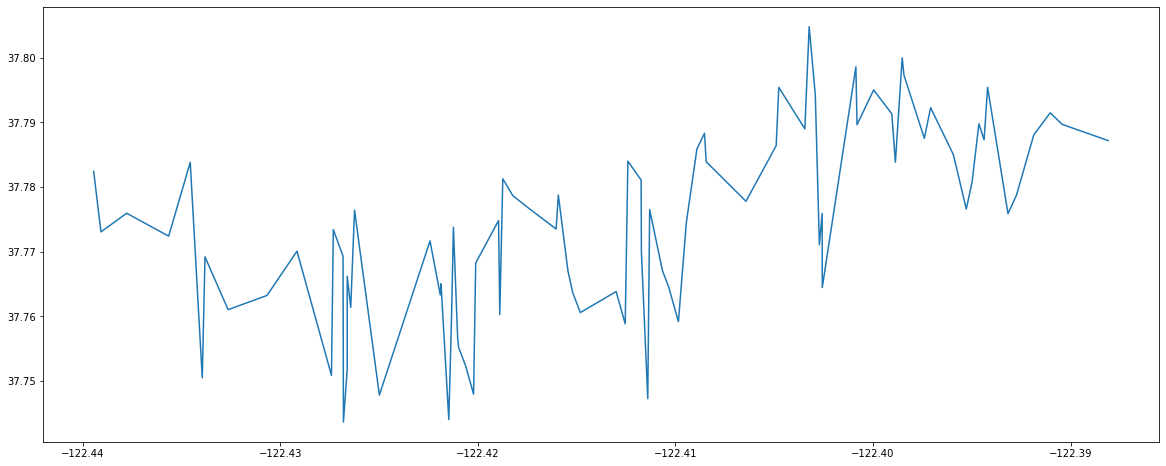

In [92]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,8))

plt.plot(df_coor_stations['start_station_longitude'],df_coor_stations['start_station_latitude'])

#### 3. Calculating the area covered by the start station using the Scipy library.

In [93]:
from scipy import integrate

x = df_coor_stations['start_station_longitude']
y = df_coor_stations['start_station_latitude']

start_station_area = integrate.trapz(y,x)
print('The area covered by the start station is ',start_station_area, 'deg²')

The area covered by the start station is  1.939676801758624 deg²


### Answering the Following Questions:

#### a. There are two types of integrals namely definite and indefinite. What type of integral do you use in this case? Give your reasons!

`The type of Integral I used for calculating the area is definite integral since there is limits from initial point to end point which represent the area from the curve. While indefinite integral has no limits and there is no specified function, it will be impossible to apply for this situation.`

#### b. There are two methods in integral calculations, namely symbolic and numerical. Which one do you use in this case and why?

`Because finding the area often means constant result, the method I use for this case is numerical. Meanwhile the symbolic means it contains symbol so this method result in integral always have symbols in it for example f(x) = ax^(n). Also we not find or use any function, calculating the area often based on a shape from coordinate to coordinate (even it is complex) is preferrable.`

#### c. Is it necessary to define a mathematical function ( like f(x) = x^2+2 ) in this case? Give your explanation and reasons!

`No, because based on the plot the function has no pattern and very random. All of data are in coordinate form. Based on the plot each pint defined by x as longitude and y as latitude. There is no specific formula to determine the location. To locate each of the station the company or organization will be  based on several consideration such as availability, cost, attraction etc. So there is no mathematical function only data needed to calculate the area covered by the initial station.`

### Conclusions, Assumptions, Overall Analysis
Based on the analysis above, the problem can be solved and these are the answere:

1. Which starting station is the most favorite among other stations by calculating PageRank using Eigendecomposition?

In [94]:
print('The the most favorite station among other stations is :')
PageRank_df.head(1)

The the most favorite station among other stations is :


,start_station,score
37,[Broadway at Battery St],0.506636


2. What is the area of ​​the starting bicycle station in the city of San Francisco by using Integral?

In [95]:
print('The area covered by the start station is ',start_station_area, 'deg²')

The area covered by the start station is  1.939676801758624 deg²


3. What is the answer of the followed up question in each problem?

Problem 1
a. Why in this case we apply the concept of Eigendecomposition?
`In this case, we were asked to find out which bicycle station was the most favorite in the city of San Francisco. Because there is a lot of data but there is a relationship between (start_station and end_station), then we can use the Eigecomposition method. Eigendecomposition can be used to make complicated matrix calculations simpler. There are eigenvalues and eigenvectors that will be decomposed from the matrix. In the case above, we change the value individually based on each of these bicycle stations. The relationship produces a matrix that has been generated automatically from the crosstab function. The matrix is then searched for the highest eigen value because we are looking for the favorite (in the sense that the higher the eigen value, the better). Not only stopping at the eigenvalue, we also determine which station has the largest eigenvector based on the previous eigenvalue. At the end, the station will be found. Here it can be seen with a complex matrix and to find values that are arguably important, we can use Eigendecomposition because we can also see values at other stations that are generated in vector form.`

b. From your observations, why do we end up using the df_matrix_square dataframe instead of df_matrix for the Eigendecomposition process?
Give a logical reason according to the concept of Eigendecomposition.
`Eigendecomposition is sort of type of decomposition that decomposes a matrix into eigenvectors and eigenvalues (Jason Brownlee, 2018). Based on the explanation about decomposition, square matrix is chosen because the row and the column has similiar number which make the 'df_matrix_square' square while 'df_matrix' is not. df_matrix obtained only by crosstab between ’start_station_name’ and ‘end_station_name'so some of row and column resulted in several station which sometimes only existed in one of the station or both of the station. Because ’start_station_name’ and ‘end_station_name' has different station amount it affect the matrix shape on 'df_matrix' so we can not obtain the eigen value or eigen vector. In order to make the matrix square, the 'df_matrix' were reduced by exclude the exclusive station which only exist in start or end station. Shortly, these exclusive station getting rid the station which not include in both station.With that way the 'df_matrix' row and column number can be similiar and change into 'df_matrix_square'.`

c. If viewed from the driving force, the highest PageRank value is the most favorite station. What insight will you provide?
`The most highest Page Rank obtained is 0.506636 from Broadway at Battery St. It means this station has the most visitor because of several trips done by bikers. But as for the note, not all station included since the exclusive one not at data frame matrix_square. Because there are chances those exclusive one actually are more favorite among all inclusives. The favorite can be influenced by several factors such as it near the tourist attraction, close with student's study or hangout area, strategic area and others factors. Since the bike is rental, With this data hopefully in the future, the bike distribution can be done well.`


Problem 2
a. There are two types of integrals namely definite and indefinite. What type of integral do you use in this case? Give your reasons!
`The type of Integral I used for calculating the area is definite integral since there is limits from initial point to end point which represent the area from the curve. While indefinite integral has no limits and there is no specified function, it will be impossible to apply for this situation.`

b. There are two methods in integral calculations, namely symbolic and numerical. Which one do you use in this case and why?
`Because finding the area often means constant result, the method I use for this case is numerical. Meanwhile the symbolic means it contains symbol so this method result in integral always have symbols in it for example f(x) = ax^(n). Also we not find or use any function, calculating the area often based on a shape from coordinate to coordinate (even it is complex) is preferrable.`

c. Is it necessary to define a mathematical function ( like f(x) = x^2+2 ) in this case? Give your explanation and reasons!
`No, because based on the plot the function has no pattern and very random. All of data are in coordinate form. Based on the plot each pint defined by x as longitude and y as latitude. There is no specific formula to determine the location. To locate each of the station the company or organization will be  based on several consideration such as availability, cost, attraction etc. So there is no mathematical function only data needed to calculate the area covered by the initial station.`


### REFERENCES 
1. Jason Brownlee, Basics of Linear Algebra for Machine Learning :
Discover the Mathematical Language of Data in Python (2018), retrieved from
https://www.google.co.id/books/edition/Basics_of_Linear_Algebra_for_Machine_Lea/PAioDwAAQBAJ?hl=id&gbpv=1&dq=eigendecomposition&pg=PA116&printsec=frontcover